In [1]:
import mediapipe as mp
import cv2
import pickle
import math
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
mp_drawing = mp.solutions.drawing_utils  # Drawing helpers
mp_pose = mp.solutions.pose  # Mediapipe Solutions


In [8]:
with open('mid_poses.pkl', 'rb') as f:
    model = pickle.load(f)

In [7]:
!!pip install sklearn

['Requirement already satisfied: sklearn in c:\\users\\windows\\appdata\\local\\programs\\python\\python310\\lib\\site-packages (0.0.post1)']

In [2]:
landmark_names = [
        'nose',
        'left_eye_inner', 'left_eye', 'left_eye_outer',
        'right_eye_inner', 'right_eye', 'right_eye_outer',
        'left_ear', 'right_ear',
        'mouth_left', 'mouth_right',
        'left_shoulder', 'right_shoulder',
        'left_elbow', 'right_elbow',
        'left_wrist', 'right_wrist',
        'left_pinky_1', 'right_pinky_1',
        'left_index_1', 'right_index_1',
        'left_thumb_2', 'right_thumb_2',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_heel', 'right_heel',
        'left_foot_index', 'right_foot_index'
    ]

In [3]:
def return_angle(landmark1, landmark2, landmark3):
    x1, y1 = landmark1.x, landmark1.y
    x2, y2 = landmark2.x, landmark2.y
    x3, y3 = landmark3.x, landmark3.y
    
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    if angle < 0:
        angle += 360
        
    # Return the calculated angle.
    return angle

In [4]:
arms_err_msgs = ['move left arm up', 'move left arm down', 
                 'move right arm up', 'move right arm down',
                'straighten your left arm', 'straighten your right arm']

legs_err_msgs = ['move left leg up', 'move left leg down', 
                 'move right leg up', 'move right leg down'
                'straighten your left leg', 'straighten your right leg'
                'bend your knees', 'bend your left knee', 'bend your right knee', 'move your legs apart', 
                 'bring your legs closer']

hips_error_message = ['lean to the left', 'lean to the right', 'stand straight']

back_error_message = ['bend your back', 'straighten your back']

head_error_message = ['put your head straight']

In [5]:
joints = [
    'left_elbow',
    'right_elbow',
    'right_shoulder',
    'left_shoulder',
    'left_knee',
    'right_knee',
    'head',
    'left_hip',
    'right_hip',
    'left_ankle',
    'right_ankle'
]


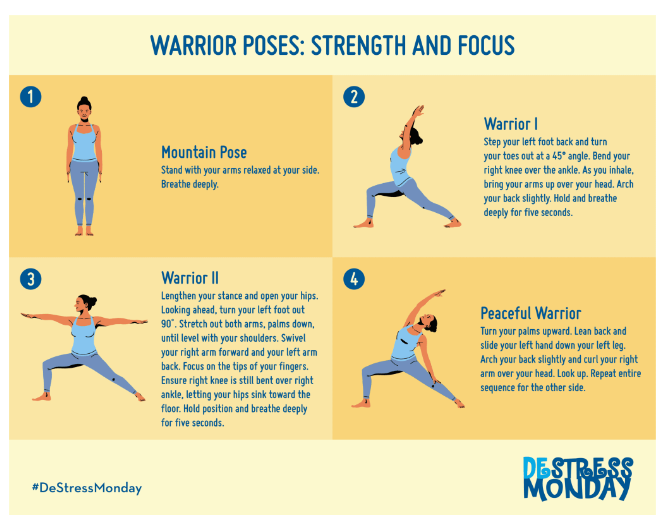

# Error checking for T - pose

In [19]:
input_frame = cv2.imread('test.jpg')
input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

# Initialize fresh pose tracker and run it.
with mp_pose.Pose() as pose_tracker:
    result = pose_tracker.process(image=input_frame)
    pose_landmarks = result.pose_landmarks

image = cv2.cvtColor(input_frame, cv2.COLOR_RGB2BGR)

output_frame = image.copy()

pose = pose_landmarks.landmark


left_elbow_angle = return_angle(pose[landmark_names.index('left_wrist')], 
                                   pose[landmark_names.index('left_elbow')], 
                                   pose[landmark_names.index('left_shoulder')])

right_elbow_angle = return_angle(pose[landmark_names.index('right_shoulder')], 
                                   pose[landmark_names.index('right_elbow')], 
                                   pose[landmark_names.index('right_wrist')])

left_shoulder_angle = return_angle(pose[landmark_names.index('left_elbow')], 
                                   pose[landmark_names.index('left_shoulder')], 
                                   pose[landmark_names.index('left_hip')])

right_shoulder_angle = return_angle(pose[landmark_names.index('right_hip')], 
                                    pose[landmark_names.index('right_shoulder')], 
                                    pose[landmark_names.index('right_elbow')])

left_hip_angle = return_angle(pose[landmark_names.index('left_knee')], 
                              pose[landmark_names.index('left_hip')], 
                              pose[landmark_names.index('left_shoulder')])

right_hip_angle = return_angle(pose[landmark_names.index('right_shoulder')], 
                              pose[landmark_names.index('right_hip')], 
                              pose[landmark_names.index('right_knee')])

left_knee_angle = return_angle(pose[landmark_names.index('left_ankle')], 
                              pose[landmark_names.index('left_knee')], 
                              pose[landmark_names.index('left_hip')])

right_knee_angle = return_angle(pose[landmark_names.index('right_hip')], 
                              pose[landmark_names.index('right_knee')], 
                              pose[landmark_names.index('right_ankle')])

# Warrior Pose Along with Steps

In [20]:
mountain_pose_angles = {
    x : None for x in joints
}

In [11]:
mountain_pose_angles['left_knee'] = 180
mountain_pose_angles['right_knee'] = 180
mountain_pose_angles['left_shoulder'] = 10
mountain_pose_angles['right_shoulder'] = 10
mountain_pose_angles['left_hip'] = 180
mountain_pose_angles['right_hip'] = 180

In [21]:
def compute_joint_angles(pose):
    left_elbow_angle = return_angle(pose[landmark_names.index('left_wrist')], 
                                       pose[landmark_names.index('left_elbow')], 
                                       pose[landmark_names.index('left_shoulder')])
    right_elbow_angle = return_angle(pose[landmark_names.index('right_shoulder')], 
                                       pose[landmark_names.index('right_elbow')], 
                                       pose[landmark_names.index('right_wrist')])
    left_shoulder_angle = return_angle(pose[landmark_names.index('left_elbow')], 
                                       pose[landmark_names.index('left_shoulder')], 
                                       pose[landmark_names.index('left_hip')])
    right_shoulder_angle = return_angle(pose[landmark_names.index('right_hip')], 
                                        pose[landmark_names.index('right_shoulder')], 
                                        pose[landmark_names.index('right_elbow')])
    left_hip_angle = return_angle(pose[landmark_names.index('left_knee')], 
                                  pose[landmark_names.index('left_hip')], 
                                  pose[landmark_names.index('left_shoulder')])
    right_hip_angle = return_angle(pose[landmark_names.index('right_shoulder')], 
                                  pose[landmark_names.index('right_hip')], 
                                  pose[landmark_names.index('right_knee')])
    left_knee_angle = return_angle(pose[landmark_names.index('left_ankle')], 
                                  pose[landmark_names.index('left_knee')], 
                                  pose[landmark_names.index('left_hip')])
    right_knee_angle = return_angle(pose[landmark_names.index('right_hip')], 
                                  pose[landmark_names.index('right_knee')], 
                                  pose[landmark_names.index('right_ankle')])
    
    computed_angles = {'left_elbow_angle' : left_elbow_angle, 
                       'right_elbow_angle' :right_elbow_angle, 
                       'left_shoulder_angle' :left_shoulder_angle, 
                       'right_shoulder_angle' :right_shoulder_angle, 
                       'left_hip_angle' :left_hip_angle, 
                       'right_hip_angle' :right_hip_angle,
                       'left_knee_angle' :left_knee_angle, 
                       'right_knee_angle' :right_knee_angle}
    return computed_angles

In [22]:
for angle in compute_joint_angles(pose):
    print(angle)
computed_angles=compute_joint_angles(pose)

left_elbow_angle
right_elbow_angle
left_shoulder_angle
right_shoulder_angle
left_hip_angle
right_hip_angle
left_knee_angle
right_knee_angle


In [23]:
for angle in computed_angles:
    print(angle)

left_elbow_angle
right_elbow_angle
left_shoulder_angle
right_shoulder_angle
left_hip_angle
right_hip_angle
left_knee_angle
right_knee_angle


# Tree Pose Angles

In [24]:
input_frame = cv2.imread('test.jpg')
input_frame = cv2.cvtColor(input_frame, cv2.COLOR_BGR2RGB)

# Initialize fresh pose tracker and run it.
with mp_pose.Pose() as pose_tracker:
    result = pose_tracker.process(image=input_frame)
    pose_landmarks = result.pose_landmarks

image = cv2.cvtColor(input_frame, cv2.COLOR_RGB2BGR)

output_frame = image.copy()

pose = pose_landmarks.landmark


left_elbow_angle = return_angle(pose[landmark_names.index('left_wrist')], 
                                   pose[landmark_names.index('left_elbow')], 
                                   pose[landmark_names.index('left_shoulder')])

right_elbow_angle = return_angle(pose[landmark_names.index('right_shoulder')], 
                                   pose[landmark_names.index('right_elbow')], 
                                   pose[landmark_names.index('right_wrist')])

left_shoulder_angle = return_angle(pose[landmark_names.index('left_elbow')], 
                                   pose[landmark_names.index('left_shoulder')], 
                                   pose[landmark_names.index('left_hip')])

right_shoulder_angle = return_angle(pose[landmark_names.index('right_hip')], 
                                    pose[landmark_names.index('right_shoulder')], 
                                    pose[landmark_names.index('right_elbow')])

left_hip_angle = return_angle(pose[landmark_names.index('left_knee')], 
                              pose[landmark_names.index('left_hip')], 
                              pose[landmark_names.index('left_shoulder')])

right_hip_angle = return_angle(pose[landmark_names.index('right_shoulder')], 
                              pose[landmark_names.index('right_hip')], 
                              pose[landmark_names.index('right_knee')])

left_knee_angle = return_angle(pose[landmark_names.index('left_ankle')], 
                              pose[landmark_names.index('left_knee')], 
                              pose[landmark_names.index('left_hip')])

right_knee_angle = return_angle(pose[landmark_names.index('right_hip')], 
                              pose[landmark_names.index('right_knee')], 
                              pose[landmark_names.index('right_ankle')])

In [25]:
tree_pose_angles = {
    x+"_angle" : None for x in joints
}


tree_pose_angles['left_elbow_angle'] = 180
tree_pose_angles['right_elbow_angle'] = 180
tree_pose_angles['left_shoulder_angle'] = 180
tree_pose_angles['right_shoulder_angle'] = 180
tree_pose_angles['left_hip_angle'] = 180
tree_pose_angles['right_hip_angle'] = 180

tree_pose_angles

{'left_elbow_angle': 180,
 'right_elbow_angle': 180,
 'right_shoulder_angle': 180,
 'left_shoulder_angle': 180,
 'left_knee_angle': None,
 'right_knee_angle': None,
 'head_angle': None,
 'left_hip_angle': 180,
 'right_hip_angle': 180,
 'left_ankle_angle': None,
 'right_ankle_angle': None}

## Get Model Predictions

In [26]:
def get_pose_prediction(pose):
    pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())                    
    X = pd.DataFrame([pose_row])
    pose_detection_class = model.predict(X)[0]
    pose_detection_probability = model.predict_proba(X)[0]
    return pose_detection_class, pose_detection_probability

In [27]:
name, pose_detection_probability = get_pose_prediction(pose)
round(pose_detection_probability[np.argmax(pose_detection_probability)],2)

0.47

In [28]:
'left_elbow' in tree_pose_angles.keys()

False

In [29]:
def generate_errors(pose_name, pose):
    #calculate the angles
    actual_angles = compute_joint_angles(pose)
    max_diff = 0
    diff_joint = ""    
    if pose_name == "tree":
        for angles in actual_angles.keys():
            
            if tree_pose_angles[angles] is not None:
                    diff = abs(actual_angles[angles] - tree_pose_angles[angles])
                    if diff > abs(max_diff):
                        max_diff = actual_angles[angles] - tree_pose_angles[angles]
                        diff_joint = angles
    return max_diff, diff_joint
    

In [30]:
generate_errors("tree", pose)

(-81.62280870750654, 'left_shoulder_angle')

# Running on Live video

In [32]:
cap = cv2.VideoCapture(0)
curr_time = 0
#pose model
with mp_pose.Pose() as pose_tracker:

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        result= pose_tracker.process(image)
        pose_landmarks = result.pose_landmarks

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            pose = pose_landmarks.landmark
        
            pose_name = "tree"
            pose_name, score_arr = get_pose_prediction(pose)
            score = round(score_arr[np.argmax(score_arr)],2)
        
            #put redirect bhako link ko number instead of pose name for the website
            if pose_name == "tree" and score > 0.72:
                difference, name = generate_errors(pose_name, pose)
                print(name)
                if curr_time >30:
                    play_message("correct.mp3")
                    curr_time = 0
                
            elif pose_name == "tree" and score <0.72:
                if curr_time >30:
                    print("Incorrect")
                    curr_time = 0
                
            else:
                if curr_time >= 50:
                    play_message("test2.mp3")
                    curr_time = 0
        
        except:
            pass
        
        cv2.imshow('Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
        curr_time +=1
        

cap.release()
cv2.destroyAllWindows()

Incorrect
Incorrect
right_elbow_angle
right_elbow_angle
left_elbow_angle
left_elbow_angle
left_elbow_angle


# TTS Implementation

In [ ]:
!pip install playsound
!pip install gtts


In [37]:
from gtts import gTTS
from playsound import playsound
import os
import time

In [42]:
def tts_file_generation(message, language, file_name):
    output = gTTS(text = message, lang = language, slow = False)
    file_path = "ErrorMessages"
    final_path = os.path.join(file_path, file_name)
    output.save(final_path)

In [43]:
def play_message(file_name):
    file_path = "ErrorMessages"
    final_path = os.path.join(file_path, file_name)
    playsound(final_path)

In [44]:
tts_file_generation("Do the pose correctly", 'en', "test2.mp3")

In [45]:
tts_file_generation("Maintain Pose", 'en', "correct.mp3")